<a href="https://colab.research.google.com/github/QuanPhamAnh/Coursera_Capstone/blob/main/Applied_DS_IBM_Week_4_Version_2_1_(Foody_HN%26HCMC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from pandas import json_normalize
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="example app",timeout=None)
import re
!pip install unidecode
import unidecode
import json

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 245kB 6.3MB/s 


In [2]:
page = 1
city = 'ha-noi'
url = 'https://www.foody.vn/{}/nha-hang?ds=Restaurant&vt=row&st=5&c=1&page={}&categoryId=1&append=true'.format(city,page)
r = requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   ƒê·ªãa ƒëi·ªÉm Nh√† h√†ng t·∫°i H√† N·ªôi | Foody.vn
  </title>
  <meta content="text/html;charset=utf-8" http-equiv="Content-type"/>
  <meta content="Danh s√°ch h∆°n 2,887 ƒë·ªãa ƒëi·ªÉm Nh√† h√†ng t·∫°i H√† N·ªôi. Foody.vn l√† website #1 t·∫°i VN v·ªÅ t√¨m ki·∫øm ƒë·ªãa ƒëi·ªÉm, c√≥ h√†ng ng√†n b√¨nh lu·∫≠n, h√¨nh ·∫£nh" name="description"/>
  <meta content="Foody.vn l√† n∆°i chia s·∫ª v√† ƒë√°nh gi√° ƒë·ªãa ƒëi·ªÉm, v·ªõi h√†ng ng√†n ƒë·ªãa ƒëi·ªÉm v·ªÅ ·∫©m th·ª±c, gi·∫£i tr√≠ c√πng h√†ng ng√†n b√¨nh lu·∫≠n. Tham gia ƒë·ªÉ chia s·∫ª tr·∫£i nghi·ªám v·ªõi c·ªông ƒë·ªìng" name="keywords"/>
  <meta content="app-id=1218739449" name="apple-itunes-app"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="index, follow" name="robots">
   <meta content="9F288B3B53D32225CE6A70FA2DB2BF

In [3]:
regex = re.compile("var jsonData = .*(?:\\r\\n)")
jsondata = regex.findall(soup.text)
jsondata[0]

'var jsonData = {"photoCollectionResultCount":8703,"provinceId":218,"categoryId":1,"districtId":0,"districtName":"H√† N·ªôi","searchUrl":"/ha-noi/nha-hang","searchDefaultUrl":"/ha-noi/dia-diem","keyword":"","viewType":"row","sortType":5,"priceMin":0,"priceMax":5000000,"districts":[{"Id":20,"Avatar":null,"ParentId":0,"ParentName":null,"Name":"Qu·∫≠n Ba ƒê√¨nh","UrlRewriteName":null,"ResultCount":0,"Selected":false,"Min":null,"Max":null,"Children":[],"FilterType":2,"AsciiName":"Quan Ba Dinh"},{"Id":690,"Avatar":null,"ParentId":0,"ParentName":null,"Name":"Qu·∫≠n B·∫Øc T·ª´ Li√™m","UrlRewriteName":null,"ResultCount":0,"Selected":false,"Min":null,"Max":null,"Children":[],"FilterType":2,"AsciiName":"Quan Bac Tu Liem"},{"Id":21,"Avatar":null,"ParentId":0,"ParentName":null,"Name":"Qu·∫≠n C·∫ßu Gi·∫•y","UrlRewriteName":null,"ResultCount":0,"Selected":false,"Min":null,"Max":null,"Children":[],"FilterType":2,"AsciiName":"Quan Cau Giay"},{"Id":22,"Avatar":null,"ParentId":0,"ParentName":null,"Name"

In [4]:
jsondata = jsondata[0].replace('var jsonData =','').strip()
jsondata = jsondata[:-1]
results_json = json.loads(jsondata)

In [5]:
results_json

{'adItems': [],
 'allAreas': [],
 'allCategories': [],
 'allCuisines': [],
 'allDinings': [],
 'allDishCategories': [],
 'allDistricts': [],
 'allProperties': [],
 'allPurposes': [],
 'articleResultCount': 4341,
 'book': False,
 'brand': '',
 'categoryId': 1,
 'currentPage': 1,
 'districtId': 0,
 'districtName': 'H√† N·ªôi',
 'districts': [{'AsciiName': 'Quan Ba Dinh',
   'Avatar': None,
   'Children': [],
   'FilterType': 2,
   'Id': 20,
   'Max': None,
   'Min': None,
   'Name': 'Qu·∫≠n Ba ƒê√¨nh',
   'ParentId': 0,
   'ParentName': None,
   'ResultCount': 0,
   'Selected': False,
   'UrlRewriteName': None},
  {'AsciiName': 'Quan Bac Tu Liem',
   'Avatar': None,
   'Children': [],
   'FilterType': 2,
   'Id': 690,
   'Max': None,
   'Min': None,
   'Name': 'Qu·∫≠n B·∫Øc T·ª´ Li√™m',
   'ParentId': 0,
   'ParentName': None,
   'ResultCount': 0,
   'Selected': False,
   'UrlRewriteName': None},
  {'AsciiName': 'Quan Cau Giay',
   'Avatar': None,
   'Children': [],
   'FilterType': 2,
 

In [6]:
r1 = results_json['searchItems'][0]

In [7]:
print('Name: ', r1['Name'],
      ', Address: ', r1['Address'], r1['District'],
      ', Rating: ', r1['AvgRating'],
      ', Cuisines: ', r1['Cuisines'][0]['Name'],
      ', Latitude: ', r1['Latitude'],
      ', Longitude: ', r1['Longitude'],
      ', Total Review: ', r1['TotalReview'])

Name:  Grille6 - Salad, Steak & Pasta - H√†o Nam , Address:  184 H√†o Nam Qu·∫≠n ƒê·ªëng ƒêa , Rating:  7.5 , Cuisines:  ƒê√¥ng √Çu , Latitude:  21.028235 , Longitude:  105.827683 , Total Review:  448


In [8]:
len(r1['SubItems'])

4

In [9]:
print(r1['SubItems'][0]['Name'], r1['SubItems'][0]['Address'], r1['SubItems'][0]['City'])

Botanica - Salad, Steak & Pasta - Th√°i Phi√™n 3 Th√°i Phi√™n H√† N·ªôi


In [10]:
r2 = results_json['searchItems'][1]
r2

{'Address': 'T·∫ßng 1, AEON Mall Long Bi√™n, 27 C·ªï Linh',
 'AdsProviders': [],
 'AlbumUrl': '/ha-noi/food-court-aeon-mall-long-bien/album-anh',
 'AvgRating': '7.5',
 'AvgRatingOriginal': 7.482,
 'BankCards': [],
 'BookingMobileUrl': '',
 'BookingUrl': '',
 'BranchName': 'H·ªá th·ªëng ',
 'BranchUrl': '',
 'Categories': [{'ASCIIName': None,
   'DetailUrl': None,
   'Id': 1,
   'Name': 'Nh√† h√†ng',
   'NameEn': None}],
 'CategoryGroupKey': None,
 'City': 'H√† N·ªôi',
 'Cuisines': [{'ASCIIName': None,
   'DetailUrl': '/ha-noi/dia-diem-phong-cach-quoc-te',
   'Id': 50,
   'Name': 'Qu·ªëc t·∫ø',
   'NameEn': None}],
 'DeliveryUrl': '',
 'DetailUrl': '/ha-noi/food-court-aeon-mall-long-bien',
 'Distance': None,
 'District': 'Qu·∫≠n Long Bi√™n',
 'DistrictId': 27,
 'DistrictUrl': '/ha-noi/khu-vuc-quan-long-bien',
 'DocumentType': 0,
 'Floor': {'Avatar': 'https://images.foody.vn/default/s50/no-image.png',
  'Code': None,
  'Color': None,
  'Description': None,
  'DescriptionEn': None,
  'Id'

In [11]:
r2['SubItems'] == []

True

In [12]:
def CreateDataframe(result):

    # create a placeholder
    temp_df = pd.DataFrame(columns = ['Name','Address','District','City','Rating','Cuisine','Latitude','Longitude','Total Review'])
    
    # get relevant infomation
    name = result['Name']
    address = result['Address']
    district =  result['District']
    city = result['City']
    rating = result['AvgRating']
    try:
        cuisine = result['Cuisines'][0]['Name']
    except:
        cuisine = np.nan
    latitude = result['Latitude']
    longitude = result['Longitude']
    count = result['TotalReview']

    # add data into placeholder
    temp_df = temp_df.append({'Name':name,
                              'Address':address,
                              'District':district,
                              'City':city,
                              'Rating':rating,
                              'Cuisine':cuisine,
                              'Latitude':latitude,
                              'Longitude':longitude,
                              'Total Review':count
                              }, ignore_index=True)
    
    return temp_df

In [13]:
def GetRestaurantInfo(city,page):

    # create a placeholder dataframe
    temp_restaurant_df = pd.DataFrame(columns = ['Name','Address','District','City','Rating','Cuisine','Latitude','Longitude','Total Review'])

    # request results page
    url = 'https://www.foody.vn/{}/nha-hang?ds=Restaurant&vt=row&st=5&c=1&page={}&categoryId=1&append=true'.format(city,page)    
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # extract results from soup and load as a json
    regex = re.compile("var jsonData = .*(?:\\r\\n)")
    jsondata = regex.findall(soup.text)
    jsondata = jsondata[0].replace('var jsonData =','').strip()
    jsondata = jsondata[:-1]
    results_json = json.loads(jsondata)
    results = results_json['searchItems']

    # get relevant infomation for each restaurant from results
    results = results_json['searchItems']
    for result in results:
        temp_restaurant_df = temp_restaurant_df.append(CreateDataframe(result),ignore_index = True)
    
    # If it's a branch of restaurants, we will need to check for its subItems
        if result['SubItems'] != []:
            for i in range(len(result['SubItems'])):
                r = result['SubItems'][i]
                temp_restaurant_df = temp_restaurant_df.append(CreateDataframe(r),ignore_index = True)
    return temp_restaurant_df

In [14]:
restaurant_df = pd.DataFrame(columns = ['Name','Address','District','City','Rating','Cuisine','Latitude','Longitude','Total Review'])
cities = ['ha-noi','ho-chi-minh']

for city in cities:
    page = 1
    number_of_results = 12
    while number_of_results >= 12:
        sub_result = GetRestaurantInfo(city,page)
        number_of_results = len(sub_result)
        restaurant_df = restaurant_df.append(sub_result,ignore_index = True)
        page += 1

In [15]:
restaurant_df

Name  ... Total Review
0         Grille6 - Salad, Steak & Pasta - H√†o Nam  ...          448
1     Botanica - Salad, Steak & Pasta - Th√°i Phi√™n  ...          380
2       Botanica - Salad, Steak & Pasta - Gi·∫£ng V√µ  ...          276
3      Grille6 - Salad, Steak & Pasta - L√™ VƒÉn H∆∞u  ...            3
4        Botanica Salad, Steak & Pasta - Trung H√≤a  ...            2
...                                            ...  ...          ...
5639                    Food Court - An ƒê√¥ng Plaza  ...            2
5640                       Nh√† H√†ng Sentosa Palace  ...            2
5641        Nh√† H√†ng Kh√°ch S·∫°n Gi√≥ L·ªông - T·∫Øc Xu·∫•t  ...            2
5642                                   Nh√† H√†ng 86  ...            2
5643                VIB Kitchen - Indian Resturent  ...            2

[5644 rows x 9 columns]

In [16]:
restaurant_df['Total Review'] = pd.to_numeric(restaurant_df['Total Review'])
restaurant_df['Rating'].replace('_._',np.nan, inplace = True)
restaurant_df.dropna(inplace = True)
restaurant_df['Rating'] = pd.to_numeric(restaurant_df['Rating'])
restaurant_df

Name  ... Total Review
0         Grille6 - Salad, Steak & Pasta - H√†o Nam  ...          448
1     Botanica - Salad, Steak & Pasta - Th√°i Phi√™n  ...          380
2       Botanica - Salad, Steak & Pasta - Gi·∫£ng V√µ  ...          276
3      Grille6 - Salad, Steak & Pasta - L√™ VƒÉn H∆∞u  ...            3
5                 Food Court - AEON Mall Long Bi√™n  ...          442
...                                            ...  ...          ...
5639                    Food Court - An ƒê√¥ng Plaza  ...            2
5640                       Nh√† H√†ng Sentosa Palace  ...            2
5641        Nh√† H√†ng Kh√°ch S·∫°n Gi√≥ L·ªông - T·∫Øc Xu·∫•t  ...            2
5642                                   Nh√† H√†ng 86  ...            2
5643                VIB Kitchen - Indian Resturent  ...            2

[5062 rows x 9 columns]

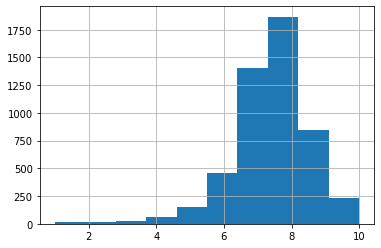

In [17]:
restaurant_df['Rating'].hist()

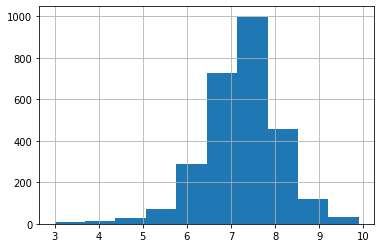

In [18]:
restaurant_df[restaurant_df['Total Review'] >= 10]['Rating'].hist()

In [19]:
filtered_restaurant_df = restaurant_df[restaurant_df['Total Review'] >= 10].drop(columns=['Address'])
filtered_restaurant_df.reset_index(drop = True, inplace = True)
filtered_restaurant_df

Name  ... Total Review
0         Grille6 - Salad, Steak & Pasta - H√†o Nam  ...          448
1     Botanica - Salad, Steak & Pasta - Th√°i Phi√™n  ...          380
2       Botanica - Salad, Steak & Pasta - Gi·∫£ng V√µ  ...          276
3                 Food Court - AEON Mall Long Bi√™n  ...          442
4             G√† R√°n Popeyes - AEON Mall Long Bi√™n  ...           84
...                                            ...  ...          ...
2734           Saigon Social Space - Nh√† H√†ng √Å √Çu  ...           10
2735                            The Organic Bistro  ...           10
2736      Stirling Steaks Vietnam - Nguy·ªÖn Gia Tr√≠  ...           10
2737        Pizza Tonda Vietnam - Vincom Mega Mall  ...           10
2738                        Nh√† H√†ng C∆° Kh√≠ H√† N·ªôi  ...           10

[2739 rows x 8 columns]

In [20]:
filtered_restaurant_df['City'].value_counts()

TP. HCM    1816
H√† N·ªôi      923
Name: City, dtype: int64

In [21]:
restaurant_df['City'].value_counts()

TP. HCM    2966
H√† N·ªôi     2096
Name: City, dtype: int64

In [22]:
pd.pivot_table(filtered_restaurant_df, index = 'City', aggfunc={'Rating':np.mean, 'Total Review':np.sum})

Rating  Total Review
City                           
H√† N·ªôi   7.238137         42370
TP. HCM  7.264317        126796

In [23]:
restaurant_by_district = filtered_restaurant_df.groupby(['City','District'])['Name'].count()
print('H√† N·ªôi \n\n', restaurant_by_district['H√† N·ªôi'].sort_values(ascending = False), '\n\nTP.HCM \n\n', restaurant_by_district['TP. HCM'].sort_values(ascending = False))

H√† N·ªôi 

 District
Qu·∫≠n C·∫ßu Gi·∫•y        151
Qu·∫≠n Ho√†n Ki·∫øm       141
Qu·∫≠n ƒê·ªëng ƒêa         136
Qu·∫≠n Hai B√† Tr∆∞ng    135
Qu·∫≠n Ba ƒê√¨nh         130
Qu·∫≠n Thanh Xu√¢n       65
Qu·∫≠n Nam T·ª´ Li√™m      38
Qu·∫≠n Long Bi√™n        38
Qu·∫≠n T√¢y H·ªì           37
Qu·∫≠n Ho√†ng Mai        23
Qu·∫≠n H√† ƒê√¥ng          19
Qu·∫≠n B·∫Øc T·ª´ Li√™m       7
Huy·ªán S√≥c S∆°n          2
Huy·ªán ƒê√¥ng Anh         1
Name: Name, dtype: int64 

TP.HCM 

 District
Qu·∫≠n 1              567
Qu·∫≠n 3              174
Qu·∫≠n 7              153
Qu·∫≠n B√¨nh Th·∫°nh     114
Qu·∫≠n T√¢n B√¨nh       104
Qu·∫≠n 10             104
Qu·∫≠n 2               95
Qu·∫≠n G√≤ V·∫•p          78
Qu·∫≠n Ph√∫ Nhu·∫≠n       76
Qu·∫≠n T√¢n Ph√∫         70
Qu·∫≠n 5               70
Qu·∫≠n Th·ªß ƒê·ª©c         51
Qu·∫≠n B√¨nh T√¢n        37
Qu·∫≠n 11              26
Qu·∫≠n 6               18
Qu·∫≠n 4               17
Qu·∫≠n 8               17
Qu·∫≠n 9               15
Qu·∫≠n 12              11
Huy·

In [24]:
filtered_restaurant_df['Cuisine'].value_counts()

M√≥n Vi·ªát          855
M√≥n Nh·∫≠t          455
M√≥n H√†n           342
Ch√¢u M·ªπ           172
M√≥n Trung Hoa     144
√ù                 132
M√≥n √Çu            122
M√≥n √Å             116
Qu·ªëc t·∫ø           114
M√≥n Th√°i           84
Ph√°p               54
M√≥n B·∫Øc            37
Singapore          24
M√≥n Mi·ªÅn Trung     22
M√≥n ·∫§n ƒê·ªô          21
M√≥n Mi·ªÅn Nam       20
ƒê·ª©c                 7
ƒê√¥ng √Çu             4
M·ªπ                  4
Trung ƒê√¥ng          4
M√≥n Qu·∫£ng           1
Brazil              1
B·∫Øc √Çu              1
Malaysia            1
√öc                  1
Philippines         1
Name: Cuisine, dtype: int64

In [25]:
filtered_restaurant_df['Cuisine'].replace({'M√≥n Vi·ªát':'Vietnamese',
                                       'M√≥n Nh·∫≠t':'Japanese',
                                       'M√≥n H√†n':'Korean',
                                       'Ch√¢u M·ªπ':'American',
                                       'M√≥n Trung Hoa':'Chinese',
                                       '√ù':'Italian',
                                       'M√≥n √Çu':'Western',
                                       'M√≥n √Å':'Asian',
                                       'Qu·ªëc t·∫ø':'International',
                                       'M√≥n Th√°i':'Thai',
                                       'Ph√°p':'French',
                                       'M√≥n B·∫Øc':'Vietnamese',
                                       'Singapore':'Asian',
                                       'M√≥n Mi·ªÅn Nam':'Vietnamese',
                                       'M√≥n Mi·ªÅn Trung':'Vietnamese',
                                       'M√≥n ·∫§n ƒê·ªô':'International',
                                       'H√† N·ªôi':'Vietnamese',
                                       'ƒê·ª©c':'Western',
                                       'M·ªπ':'American',
                                       'ƒê√¥ng √Çu':'Western',
                                       'Trung ƒê√¥ng':'International',
                                       'Malaysia':'Asian',
                                       '√öc':'Western',
                                       'Philippines':'Asian',
                                       'M√≥n Qu·∫£ng':'Vietnamese',
                                       'Brazil':'American',
                                       'B·∫Øc √Çu':'Western'
                                       }, inplace = True)
filtered_restaurant_df = filtered_restaurant_df[filtered_restaurant_df['Cuisine'] != 'Vietnamese']

In [26]:
filtered_restaurant_df['Cuisine'].value_counts()

Japanese         455
Korean           342
American         177
Chinese          144
Asian            142
International    139
Western          135
Italian          132
Thai              84
French            54
Name: Cuisine, dtype: int64

In [27]:
cuisine_df = filtered_restaurant_df[['Name','City','Cuisine']].groupby(by=['City','Cuisine']).count()
cuisine_df

Name
City    Cuisine            
H√† N·ªôi  American         52
        Asian            70
        Chinese          32
        French           19
        International    92
        Italian          49
        Japanese        130
        Korean          149
        Thai             27
        Western          26
TP. HCM American        125
        Asian            72
        Chinese         112
        French           35
        International    47
        Italian          83
        Japanese        325
        Korean          193
        Thai             57
        Western         109

In [28]:
cuisine_pcts = cuisine_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
cuisine_pcts.rename(columns = {'Name':'Pcts'}, inplace = True)
cuisine_pcts

Pcts
City    Cuisine                 
H√† N·ªôi  American        8.049536
        Asian          10.835913
        Chinese         4.953560
        French          2.941176
        International  14.241486
        Italian         7.585139
        Japanese       20.123839
        Korean         23.065015
        Thai            4.179567
        Western         4.024768
TP. HCM American       10.794473
        Asian           6.217617
        Chinese         9.671848
        French          3.022453
        International   4.058722
        Italian         7.167530
        Japanese       28.065630
        Korean         16.666667
        Thai            4.922280
        Western         9.412781

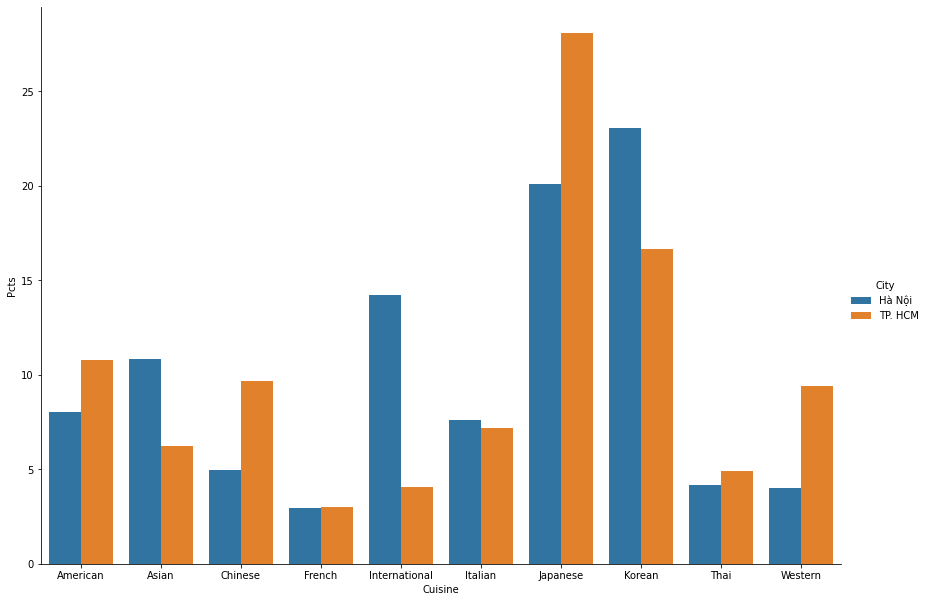

In [29]:
ax = sns.catplot(data = cuisine_pcts.reset_index(), x = 'Cuisine', y = 'Pcts', hue = 'City', kind = 'bar', height=8.27, aspect=11.7/8.27)

In [30]:
rating_df = filtered_restaurant_df[['Rating','City','Cuisine']].groupby(by=['City','Cuisine']).mean()
rating_df

Rating
City    Cuisine                
H√† N·ªôi  American       7.246154
        Asian          7.300000
        Chinese        7.315625
        French         7.742105
        International  7.502174
        Italian        7.197959
        Japanese       7.518462
        Korean         7.088591
        Thai           6.703704
        Western        7.296154
TP. HCM American       6.951200
        Asian          7.236111
        Chinese        7.400893
        French         7.440000
        International  7.697872
        Italian        7.466265
        Japanese       7.503077
        Korean         7.204663
        Thai           7.447368
        Western        7.440367

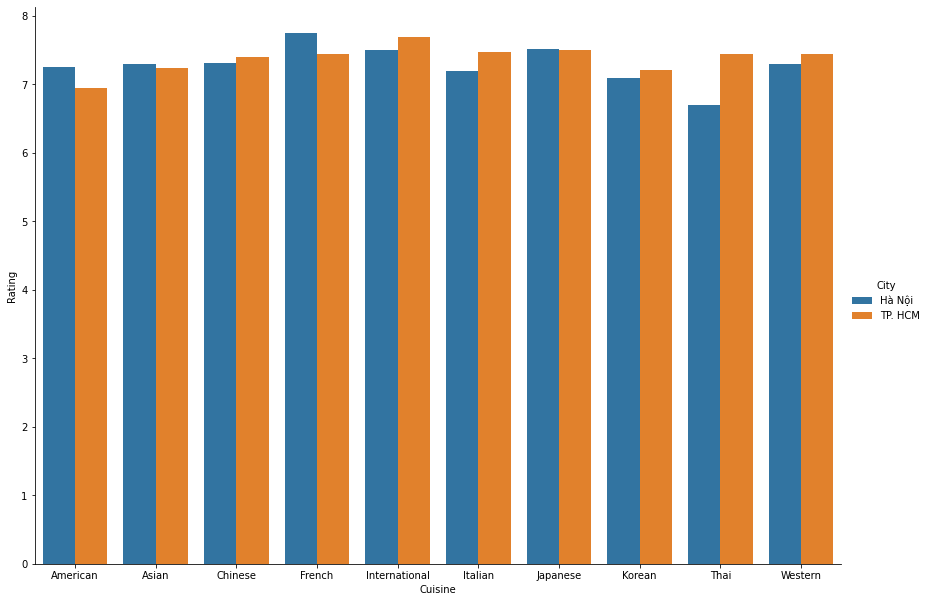

In [31]:
ax = sns.catplot(data = rating_df.reset_index(), x = 'Cuisine', y = 'Rating', hue = 'City', kind = 'bar', height=8.27, aspect=11.7/8.27)

In [34]:
map_df = pd.read_excel('/content/Danh s√°ch c·∫•p t·ªânh k√®m theo qu·∫≠n huy·ªán, ph∆∞·ªùng x√£ __H√† N·ªôi_06_03_2021.xls')
map_df

T·ªânh Th√†nh Ph·ªë  M√£ TP  ...     C·∫•p      T√™n Ti·∫øng Anh
0         Th√†nh ph·ªë H√† N·ªôi      1  ...  Ph∆∞·ªùng                NaN
1         Th√†nh ph·ªë H√† N·ªôi      1  ...  Ph∆∞·ªùng                NaN
2         Th√†nh ph·ªë H√† N·ªôi      1  ...  Ph∆∞·ªùng  Vinh Phuc Commune
3         Th√†nh ph·ªë H√† N·ªôi      1  ...  Ph∆∞·ªùng                NaN
4         Th√†nh ph·ªë H√† N·ªôi      1  ...  Ph∆∞·ªùng  Lieu Giai Commune
..                     ...    ...  ...     ...                ...
886  Th√†nh ph·ªë H·ªì Ch√≠ Minh     79  ...      X√£                NaN
887  Th√†nh ph·ªë H·ªì Ch√≠ Minh     79  ...      X√£                NaN
888  Th√†nh ph·ªë H·ªì Ch√≠ Minh     79  ...      X√£                NaN
889  Th√†nh ph·ªë H·ªì Ch√≠ Minh     79  ...      X√£                NaN
890  Th√†nh ph·ªë H·ªì Ch√≠ Minh     79  ...      X√£                NaN

[891 rows x 8 columns]

In [35]:
pin_df = pd.DataFrame(columns = ['Pin','Latitude','Longitude'])

for i in range(len(map_df)):
    pin = map_df.iloc[i]

    # Because it's hard to find location's latitude and longitude in Vietnam, I have to try many ways to find the best result 
    try:
        name = 'UBND '+pin['Ph∆∞·ªùng X√£']+', '+pin['Qu·∫≠n Huy·ªán']+', '+pin['T·ªânh Th√†nh Ph·ªë']
        location = geolocator.geocode(name)
        latitude = location.latitude
        longitude = location.longitude
    except:
        try:
            name = pin['Ph∆∞·ªùng X√£']+', '+pin['Qu·∫≠n Huy·ªán']+', '+pin['T·ªânh Th√†nh Ph·ªë']
            location = geolocator.geocode(name)
            latitude = location.latitude
            longitude = location.longitude
        except:
            try:
                name = pin['Qu·∫≠n Huy·ªán']+', '+pin['T·ªânh Th√†nh Ph·ªë']
                location = geolocator.geocode(name)
                latitude = location.latitude
                longitude = location.longitude
            except:
                name = "Can't get location"
                location = np.nan
                latitude = np.nan

    pin_df = pin_df.append({'Pin':name,'Latitude':latitude,'Longitude':longitude}, ignore_index=True)               

In [36]:
pin_df.dropna(inplace = True)
pin_df.drop_duplicates(subset=['Latitude','Longitude'],inplace=True)
pin_df

Pin   Latitude   Longitude
0                       Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  21.019506  105.816637
11       Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  21.030481  105.814172
13   Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  21.018132  105.815990
14                    Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  21.029450  105.854444
21   Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  21.029284  105.855296
..                                                 ...        ...         ...
886  X√£ Tam Th√¥n Hi·ªáp, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì ...  10.599003  106.859054
887  X√£ An Th·ªõi ƒê√¥ng, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì C...  10.592152  106.789672
888  UBND X√£ Th·∫°nh An, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì ...  10.470680  106.975232
889  UBND X√£ Long H√≤a, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì ...  10.397755  106.911282
890   X√£ L√Ω Nh∆°n, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì Ch√≠ Minh  10.471350  106.770983

[254 rows x 3 columns]

In [37]:
hn_pin_df = pin_df[pin_df['Pin'].str.endswith('Th√†nh ph·ªë H√† N·ªôi')]
hn_pin_df

Pin   Latitude   Longitude
0                       Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  21.019506  105.816637
11       Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  21.030481  105.814172
13   Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  21.018132  105.815990
14                    Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  21.029450  105.854444
21   Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  21.029284  105.855296
..                                                 ...        ...         ...
565   UBND X√£ H·ªìng S∆°n, Huy·ªán M·ªπ ƒê·ª©c, Th√†nh ph·ªë H√† N·ªôi  20.727681  105.708647
566   UBND X√£ L√™ Thanh, Huy·ªán M·ªπ ƒê·ª©c, Th√†nh ph·ªë H√† N·ªôi  20.718240  105.733470
568        X√£ Ph√πng X√°, Huy·ªán M·ªπ ƒê·ª©c, Th√†nh ph·ªë H√† N·ªôi  20.722995  105.767577
573  UBND X√£ H∆∞∆°ng S∆°n, Huy·ªán M·ªπ ƒê·ª©c, Th√†nh ph·ªë H√† N·ªôi  20.614231  105.787002
575    UBND X√£ An Ti·∫øn, Huy·ªán M·ªπ ƒê·ª©c, Th√†nh ph·ªë H√† N·ªôi  20.658347  105.736423

[75 rows x 3 columns]

In [38]:
hcmc_pin_df = pin_df[pin_df['Pin'].str.endswith('Th√†nh ph·ªë H·ªì Ch√≠ Minh')]
hcmc_pin_df

Pin   Latitude   Longitude
579     Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  10.793203  106.690203
580       Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  10.788476  106.698318
581  UBND Ph∆∞·ªùng B·∫øn Ngh√©, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠...  10.782615  106.704624
582    Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  10.772866  106.694300
583  Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  10.768828  106.698797
..                                                 ...        ...         ...
886  X√£ Tam Th√¥n Hi·ªáp, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì ...  10.599003  106.859054
887  X√£ An Th·ªõi ƒê√¥ng, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì C...  10.592152  106.789672
888  UBND X√£ Th·∫°nh An, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì ...  10.470680  106.975232
889  UBND X√£ Long H√≤a, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì ...  10.397755  106.911282
890   X√£ L√Ω Nh∆°n, Huy·ªán C·∫ßn Gi·ªù, Th√†nh ph·ªë H·ªì Ch√≠ Minh  10.471350  106.770983

[179 rows x 3 columns]

In [39]:
map_hn = folium.Map(location=[20.984, 105.769], zoom_start=11)

# add markers to map
for lat, lng, pin in zip(hn_pin_df['Latitude'], hn_pin_df['Longitude'], hn_pin_df['Pin']):
    label = pin
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hn)  
    
map_hcmc = folium.Map(location=[10.783, 106.697], zoom_start=11)

# add markers to map
for lat, lng, pin in zip(hcmc_pin_df['Latitude'], hcmc_pin_df['Longitude'], hcmc_pin_df['Pin']):
    label = pin
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hcmc)  
    

In [40]:
map_hn

In [41]:
map_hcmc

In [42]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

def calculate_distance(lat1,lng1,lat2,lng2):
    lat1 = radians(lat1)
    lng1 = radians(lng1)
    lat2 = radians(lat2)
    lng2 = radians(lng2)

    dlat = lat2 - lat1
    dlng = lng2 - lng1
  
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlng / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c * 1000

    return distance

In [43]:
calculate_distance(10.781878,106.705055,10.776159,106.705537)

638.2999257098824

In [44]:
filtered_restaurant_df['Nearest pin'] = 0
filtered_restaurant_df['Distance'] = 0
filtered_restaurant_df.reset_index(drop=True,inplace=True)
filtered_restaurant_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Name  ... Distance
0         Grille6 - Salad, Steak & Pasta - H√†o Nam  ...        0
1     Botanica - Salad, Steak & Pasta - Th√°i Phi√™n  ...        0
2       Botanica - Salad, Steak & Pasta - Gi·∫£ng V√µ  ...        0
3                 Food Court - AEON Mall Long Bi√™n  ...        0
4             G√† R√°n Popeyes - AEON Mall Long Bi√™n  ...        0
...                                            ...  ...      ...
1799                       Pou Pizza - Quang Trung  ...        0
1800                        D√™ Ng√¥ ƒê·ªìng Restaurant  ...        0
1801           Saigon Social Space - Nh√† H√†ng √Å √Çu  ...        0
1802      Stirling Steaks Vietnam - Nguy·ªÖn Gia Tr√≠  ...        0
1803        Pizza Tonda Vietnam - Vincom Mega Mall  ...        0

[1804 rows x 10 columns]

In [45]:
for row in range(len(filtered_restaurant_df)):
    
    min_distance = 1000
    i = ''
    status = 'Not in range'

    lat1 = filtered_restaurant_df.iloc[row]['Latitude']
    lng1 = filtered_restaurant_df.iloc[row]['Longitude']


    for pin in range(len(pin_df)):
        lat2 = pin_df.iloc[pin]['Latitude']
        lng2 = pin_df.iloc[pin]['Longitude']

        distance = calculate_distance(lat1,lng1,lat2,lng2)

        if distance < min_distance:
            status = 'In range of a pin'
            i = i + (pin_df.iloc[pin]['Pin']) +';'

    filtered_restaurant_df.loc[row,'Nearest pin'] = str(i)
    filtered_restaurant_df.loc[row,'Distance'] = status      

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [46]:
filtered_restaurant_df

Name  ...           Distance
0         Grille6 - Salad, Steak & Pasta - H√†o Nam  ...       Not in range
1     Botanica - Salad, Steak & Pasta - Th√°i Phi√™n  ...       Not in range
2       Botanica - Salad, Steak & Pasta - Gi·∫£ng V√µ  ...  In range of a pin
3                 Food Court - AEON Mall Long Bi√™n  ...       Not in range
4             G√† R√°n Popeyes - AEON Mall Long Bi√™n  ...       Not in range
...                                            ...  ...                ...
1799                       Pou Pizza - Quang Trung  ...       Not in range
1800                        D√™ Ng√¥ ƒê·ªìng Restaurant  ...  In range of a pin
1801           Saigon Social Space - Nh√† H√†ng √Å √Çu  ...  In range of a pin
1802      Stirling Steaks Vietnam - Nguy·ªÖn Gia Tr√≠  ...  In range of a pin
1803        Pizza Tonda Vietnam - Vincom Mega Mall  ...       Not in range

[1804 rows x 10 columns]

In [47]:
search_pin = filtered_restaurant_df[filtered_restaurant_df['Distance'] != 'Not in range']
search_pin

Name  ...           Distance
2            Botanica - Salad, Steak & Pasta - Gi·∫£ng V√µ  ...  In range of a pin
6     Cowboy Jack's Saloon American Dining - Mipec T...  ...  In range of a pin
7     Cowboy Jack's Saloon American Dining - Vincom ...  ...  In range of a pin
9     Cowboy Jack's Saloon American Dining - Sunrise...  ...  In range of a pin
13                         Gimbab H√†n Qu·ªëc - Ng·ªçc Kh√°nh  ...  In range of a pin
...                                                 ...  ...                ...
1796  Nicky BT & HBG - Beefsteak & Hamburger - AEON ...  ...  In range of a pin
1798                               Nh√† H√†ng Ph√∫ Nh·ªã ƒê·∫°i  ...  In range of a pin
1800                             D√™ Ng√¥ ƒê·ªìng Restaurant  ...  In range of a pin
1801                Saigon Social Space - Nh√† H√†ng √Å √Çu  ...  In range of a pin
1802           Stirling Steaks Vietnam - Nguy·ªÖn Gia Tr√≠  ...  In range of a pin

[1330 rows x 10 columns]

In [48]:
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(';')))

# calculate lengths of splits
lens = filtered_restaurant_df['Nearest pin'].str.split(';').map(len)

# create new dataframe, repeating or chaining as appropriate
search_pin = pd.DataFrame({'Cuisine': np.repeat(filtered_restaurant_df['Cuisine'], lens),
                           'Rating': np.repeat(filtered_restaurant_df['Rating'], lens),
                           'Nearest pin': chainer(filtered_restaurant_df['Nearest pin']),
                           })

search_pin.replace('',np.nan, inplace = True)
search_pin.dropna(inplace = True)
search_pin

Cuisine  Rating                                        Nearest pin
2            French     7.3                     Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi
2            French     7.3      Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi
6          American     7.5  UBND Ph∆∞·ªùng Ng√£ T∆∞ S·ªü, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë...
7          American     8.0                     Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi
7          American     8.0      Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi
...             ...     ...                                                ...
1796        Western     5.8  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...
1798        Chinese     7.5  UBND Ph∆∞·ªùng An L·∫°c A, Qu·∫≠n B√¨nh T√¢n, Th√†nh ph·ªë...
1800        Chinese     8.5          Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh
1801        Western     8.4  Ph∆∞·ªùng Th·∫°nh M·ªπ L·ª£i, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ...
1802  International     8.6  Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh

[2669 rows x 3 columns]

In [49]:
number_of_venues = search_pin['Nearest pin'].value_counts()
minor_post = number_of_venues[number_of_venues < 10].index.to_list()
search_pin.set_index(['Nearest pin'], inplace = True)
search_pin.drop(minor_post, inplace = True)
search_pin.reset_index(inplace = True)
search_pin

Nearest pin        Cuisine  Rating
0                        Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi         French     7.3
1         Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi         French     7.3
2     UBND Ph∆∞·ªùng Ng√£ T∆∞ S·ªü, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë...       American     7.5
3                        Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi       American     8.0
4         Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi       American     8.0
...                                                 ...            ...     ...
2507      UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  International     7.5
2508  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...        Western     5.8
2509  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...        Western     5.8
2510          Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh        Chinese     8.5
2511  Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  International     8.6

[2512 rows x 3 columns]

In [50]:
restaurant_dummy = pd.get_dummies(search_pin[['Cuisine']], prefix="", prefix_sep="")
restaurant_dummy['Nearest pin'] = search_pin['Nearest pin']
fixed_columns = [restaurant_dummy.columns[-1]] + list(restaurant_dummy.columns[:-1])
restaurant_dummy = restaurant_dummy[fixed_columns]
restaurant_dummy

Nearest pin  ...  Western
0                        Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...        0
1         Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...        0
2     UBND Ph∆∞·ªùng Ng√£ T∆∞ S·ªü, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë...  ...        0
3                        Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...        0
4         Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...        0
...                                                 ...  ...      ...
2507      UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...        0
2508  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...        1
2509  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...        1
2510          Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...        0
2511  Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...        0

[2512 rows x 11 columns]

In [51]:
restaurant_grouped = restaurant_dummy.groupby('Nearest pin').mean().reset_index()
restaurant_grouped

Nearest pin  ...   Western
0   Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
1       Ph∆∞·ªùng 01, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
2    Ph∆∞·ªùng 01, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.111111
3     Ph∆∞·ªùng 01, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.045455
4            Ph∆∞·ªùng 04, Qu·∫≠n 5, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.052632
5           Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.100000
6            Ph∆∞·ªùng 09, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.111111
7            Ph∆∞·ªùng 09, Qu·∫≠n 4, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.100000
8           Ph∆∞·ªùng 15, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.500000
9           Ph∆∞·ªùng 15, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.227273
10          Ph∆∞·ªùng 16, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.090909
11  Ph∆∞·ªùng B√¨nh Th·ªç, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...  0.000000
12    Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.127660
13     Ph∆∞·ªùng C√¥ Giang, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.144928
14      Ph∆∞·ªùng C·∫ßu Kho, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.114286
15  Ph∆∞·ªùng Hi·ªáp Ph√∫, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...  0.000000
16  Ph∆∞·ªùng H√†ng B√¥ng, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√†...  ...  0.033898
17      Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...  0.015385
18  Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  ...  0.068966
19  Ph∆∞·ªùng M·ªπ ƒê√¨nh 2, Qu·∫≠n Nam T·ª´ Li√™m, Th√†nh ph·ªë ...  ...  0.076923
20  Ph∆∞·ªùng Nguy·ªÖn C∆∞ Trinh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì C...  ...  0.169014
21  Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  ...  0.139665
22  Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...  0.134615
23  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...  0.291667
24  Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...  0.018868
25  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh, Qu·∫≠n Thanh Xu√¢n, Th√†nh ph·ªë...  ...  0.035714
26  Ph∆∞·ªùng Th·∫£o ƒêi·ªÅn, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë...  ...  0.047619
27    Ph∆∞·ªùng T√¢n Phong, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.051282
28      Ph∆∞·ªùng T√¢n Quy, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
29  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...  0.280000
30  Ph∆∞·ªùng T√¢n S∆°n Nh√¨, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì...  ...  0.083333
31  Ph∆∞·ªùng T√¢n Th√†nh, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì C...  ...  0.076923
32     Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.074627
33  Ph∆∞·ªùng TƒÉng Nh∆°n Ph√∫ A, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...  0.000000
34   Ph∆∞·ªùng V√µ Th·ªã S√°u, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.131313
35       Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.139535
36                     Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...  0.017857
37                    Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë H√† N·ªôi  ...  0.129032
38                Qu·∫≠n Hai B√† Tr∆∞ng, Th√†nh ph·ªë H√† N·ªôi  ...  0.050000
39                   Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  ...  0.068966
40  UBND Ph∆∞·ªùng 02, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch...  ...  0.000000
41  UBND Ph∆∞·ªùng 04, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì C...  ...  0.083333
42     UBND Ph∆∞·ªùng 10, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.083333
43      UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.097087
44     UBND Ph∆∞·ªùng 13, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
45      UBND Ph∆∞·ªùng 13, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.090909
46  UBND Ph∆∞·ªùng 13, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...  0.000000
47  UBND Ph∆∞·ªùng B·∫øn Ngh√©, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠...  ...  0.137143
48  UBND Ph∆∞·ªùng C·∫ßu √î

In [52]:
restaurant_pivot_rating = pd.pivot_table(search_pin, values = 'Rating', index = 'Nearest pin', columns = 'Cuisine', aggfunc= 'mean', fill_value = 0)
restaurant_pivot_rating.reset_index(inplace = True)
restaurant_pivot_rating

Cuisine                                        Nearest pin  ...   Western
0        Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
1            Ph∆∞·ªùng 01, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
2         Ph∆∞·ªùng 01, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.600000
3          Ph∆∞·ªùng 01, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  6.800000
4                 Ph∆∞·ªùng 04, Qu·∫≠n 5, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.400000
5                Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.360000
6                 Ph∆∞·ªùng 09, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.475000
7                 Ph∆∞·ªùng 09, Qu·∫≠n 4, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.100000
8                Ph∆∞·ªùng 15, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.600000
9                Ph∆∞·ªùng 15, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  8.060000
10               Ph∆∞·ªùng 16, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  5.300000
11       Ph∆∞·ªùng B√¨nh Th·ªç, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...  0.000000
12         Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.545833
13          Ph∆∞·ªùng C√¥ Giang, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.600000
14           Ph∆∞·ªùng C·∫ßu Kho, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.325000
15       Ph∆∞·ªùng Hi·ªáp Ph√∫, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...  0.000000
16       Ph∆∞·ªùng H√†ng B√¥ng, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√†...  ...  6.800000
17           Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...  6.800000
18       Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  ...  7.250000
19       Ph∆∞·ªùng M·ªπ ƒê√¨nh 2, Qu·∫≠n Nam T·ª´ Li√™m, Th√†nh ph·ªë ...  ...  7.200000
20       Ph∆∞·ªùng Nguy·ªÖn C∆∞ Trinh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì C...  ...  7.641667
21       Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  ...  7.556000
22       Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...  7.792857
23       Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...  6.742857
24       Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...  7.200000
25       Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh, Qu·∫≠n Thanh Xu√¢n, Th√†nh ph·ªë...  ...  7.100000
26       Ph∆∞·ªùng Th·∫£o ƒêi·ªÅn, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë...  ...  7.500000
27         Ph∆∞·ªùng T√¢n Phong, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.375000
28           Ph∆∞·ªùng T√¢n Quy, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
29       Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...  6.742857
30       Ph∆∞·ªùng T√¢n S∆°n Nh√¨, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì...  ...  7.500000
31       Ph∆∞·ªùng T√¢n Th√†nh, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì C...  ...  7.500000
32          Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.680000
33       Ph∆∞·ªùng TƒÉng Nh∆°n Ph√∫ A, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...  0.000000
34        Ph∆∞·ªùng V√µ Th·ªã S√°u, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.753846
35            Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.833333
36                          Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...  7.200000
37                         Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë H√† N·ªôi  ...  6.925000
38                     Qu·∫≠n Hai B√† Tr∆∞ng, Th√†nh ph·ªë H√† N·ªôi  ...  7.400000
39                        Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  ...  7.250000
40       UBND Ph∆∞·ªùng 02, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch...  ...  0.000000
41       UBND Ph∆∞·ªùng 04, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì C...  ...  7.433333
42          UBND Ph∆∞·ªùng 10, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.100000
43           UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  7.330000
44          UBND Ph∆∞·ªùng 13, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...  0.000000
4

In [53]:
restaurant_merged = restaurant_grouped.merge(restaurant_pivot_rating, on = 'Nearest pin', suffixes=('_percent', '_avgRating'))
restaurant_merged

Nearest pin  ...  Western_avgRating
0   Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           0.000000
1       Ph∆∞·ªùng 01, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           0.000000
2    Ph∆∞·ªùng 01, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.600000
3     Ph∆∞·ªùng 01, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           6.800000
4            Ph∆∞·ªùng 04, Qu·∫≠n 5, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.400000
5           Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.360000
6            Ph∆∞·ªùng 09, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.475000
7            Ph∆∞·ªùng 09, Qu·∫≠n 4, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.100000
8           Ph∆∞·ªùng 15, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.600000
9           Ph∆∞·ªùng 15, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           8.060000
10          Ph∆∞·ªùng 16, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           5.300000
11  Ph∆∞·ªùng B√¨nh Th·ªç, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...           0.000000
12    Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.545833
13     Ph∆∞·ªùng C√¥ Giang, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.600000
14      Ph∆∞·ªùng C·∫ßu Kho, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.325000
15  Ph∆∞·ªùng Hi·ªáp Ph√∫, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...           0.000000
16  Ph∆∞·ªùng H√†ng B√¥ng, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√†...  ...           6.800000
17      Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...           6.800000
18  Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  ...           7.250000
19  Ph∆∞·ªùng M·ªπ ƒê√¨nh 2, Qu·∫≠n Nam T·ª´ Li√™m, Th√†nh ph·ªë ...  ...           7.200000
20  Ph∆∞·ªùng Nguy·ªÖn C∆∞ Trinh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì C...  ...           7.641667
21  Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  ...           7.556000
22  Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...           7.792857
23  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...           6.742857
24  Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...           7.200000
25  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh, Qu·∫≠n Thanh Xu√¢n, Th√†nh ph·ªë...  ...           7.100000
26  Ph∆∞·ªùng Th·∫£o ƒêi·ªÅn, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë...  ...           7.500000
27    Ph∆∞·ªùng T√¢n Phong, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.375000
28      Ph∆∞·ªùng T√¢n Quy, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           0.000000
29  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...           6.742857
30  Ph∆∞·ªùng T√¢n S∆°n Nh√¨, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì...  ...           7.500000
31  Ph∆∞·ªùng T√¢n Th√†nh, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì C...  ...           7.500000
32     Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.680000
33  Ph∆∞·ªùng TƒÉng Nh∆°n Ph√∫ A, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...           0.000000
34   Ph∆∞·ªùng V√µ Th·ªã S√°u, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.753846
35       Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.833333
36                     Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...           7.200000
37                    Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë H√† N·ªôi  ...           6.925000
38                Qu·∫≠n Hai B√† Tr∆∞ng, Th√†nh ph·ªë H√† N·ªôi  ...           7.400000
39                   Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  ...           7.250000
40  UBND Ph∆∞·ªùng 02, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch...  ...           0.000000
41  UBND Ph∆∞·ªùng 04, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì C...  ...           7.433333
42     UBND Ph∆∞·ªùng 10, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...           7.100000
43      UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, 

In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:11]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
def return_most_rating_venues(row, num_top_venues):
    row_categories = row.iloc[11:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [71]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Nearest pin']



for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Rating Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Rating Venue'.format(ind+1))

# create a new dataframe
restaurant_cuisine_sorted = pd.DataFrame(columns=columns)
restaurant_cuisine_sorted['Nearest pin'] = restaurant_merged['Nearest pin']

for ind in np.arange(restaurant_merged.shape[0]):
    restaurant_cuisine_sorted.iloc[ind, 1:6] = return_most_common_venues(restaurant_merged.iloc[ind, :], num_top_venues)
    restaurant_cuisine_sorted.iloc[ind, 6:] = return_most_rating_venues(restaurant_merged.iloc[ind, :], num_top_venues)

restaurant_cuisine_sorted.replace('_percent','', regex = True, inplace = True)
restaurant_cuisine_sorted.replace('_avgRating','', regex = True, inplace = True)
restaurant_cuisine_sorted

Nearest pin  ... 5th Most Rating Venue
0   Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Asian
1       Ph∆∞·ªùng 01, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western
2    Ph∆∞·ªùng 01, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Italian
3     Ph∆∞·ªùng 01, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              Japanese
4            Ph∆∞·ªùng 04, Qu·∫≠n 5, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...         International
5           Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Asian
6            Ph∆∞·ªùng 09, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Chinese
7            Ph∆∞·ªùng 09, Qu·∫≠n 4, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...         International
8           Ph∆∞·ªùng 15, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Italian
9           Ph∆∞·ªùng 15, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              American
10          Ph∆∞·ªùng 16, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Asian
11  Ph∆∞·ªùng B√¨nh Th·ªç, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...              Japanese
12    Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western
13     Ph∆∞·ªùng C√¥ Giang, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Chinese
14      Ph∆∞·ªùng C·∫ßu Kho, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western
15  Ph∆∞·ªùng Hi·ªáp Ph√∫, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...                Korean
16  Ph∆∞·ªùng H√†ng B√¥ng, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√†...  ...               Italian
17      Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...         International
18  Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  ...                French
19  Ph∆∞·ªùng M·ªπ ƒê√¨nh 2, Qu·∫≠n Nam T·ª´ Li√™m, Th√†nh ph·ªë ...  ...              Japanese
20  Ph∆∞·ªùng Nguy·ªÖn C∆∞ Trinh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì C...  ...               Chinese
21  Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  ...                Korean
22  Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...               Italian
23  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...              American
24  Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...               Italian
25  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh, Qu·∫≠n Thanh Xu√¢n, Th√†nh ph·ªë...  ...                Korean
26  Ph∆∞·ªùng Th·∫£o ƒêi·ªÅn, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë...  ...              American
27    Ph∆∞·ªùng T√¢n Phong, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western
28      Ph∆∞·ªùng T√¢n Quy, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Korean
29  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...              American
30  Ph∆∞·ªùng T√¢n S∆°n Nh√¨, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì...  ...                Korean
31  Ph∆∞·ªùng T√¢n Th√†nh, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì C...  ...         International
32     Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              Japanese
33  Ph∆∞·ªùng TƒÉng Nh∆°n Ph√∫ A, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...              Japanese
34   Ph∆∞·ªùng V√µ Th·ªã S√°u, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Korean
35       Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              American
36                     Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...               Chinese
37                    Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë H√† N·ªôi  ...                Korean
38                Qu·∫≠n Hai B√† Tr∆∞ng, Th√†nh ph·ªë H√† N·ªôi  ...              American
39                   Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  ...                French
40  UBND Ph∆∞·ªùng 02, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch...  ...                Korean
41  UBND Ph∆∞·ªùng 04, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì C...  ...                 Asi

In [72]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

restaurant_grouped_clustering = restaurant_merged.drop('Nearest pin', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 3, 0, 3, 3, 2, 3, 1, 2], dtype=int32)

In [73]:
# add clustering labels
restaurant_cuisine_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [74]:
restaurant_cluster = pin_df

# merge restaurant_cuisine_sorted with pin_df to add latitude/longitude for each neighborhood
restaurant_cluster = restaurant_cluster.join(restaurant_cuisine_sorted.set_index('Nearest pin'), on='Pin')
restaurant_cluster.dropna(inplace=True)
restaurant_cluster.reset_index(drop=True,inplace=True)
restaurant_cluster

Pin  ...  5th Most Rating Venue
0                      Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...                Chinese
1       Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...          International
2   Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...                Italian
3                    Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  ...                 French
4   Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  ...                 French
5   Ph∆∞·ªùng H√†ng B√¥ng, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√†...  ...                Italian
6                     Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë H√† N·ªôi  ...                 Korean
7   UBND Ph∆∞·ªùng Mai D·ªãch, Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë...  ...               American
8   UBND Ph∆∞·ªùng Kim Li√™n, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë ...  ...                 Korean
9   UBND Ph∆∞·ªùng Ng√£ T∆∞ S·ªü, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë...  ...                Western
10                Qu·∫≠n Hai B√† Tr∆∞ng, Th√†nh ph·ªë H√† N·ªôi  ...               American
11  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh, Qu·∫≠n Thanh Xu√¢n, Th√†nh ph·ªë...  ...                 Korean
12  Ph∆∞·ªùng M·ªπ ƒê√¨nh 2, Qu·∫≠n Nam T·ª´ Li√™m, Th√†nh ph·ªë ...  ...               Japanese
13     Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Japanese
14       Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               American
15  UBND Ph∆∞·ªùng B·∫øn Ngh√©, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠...  ...               Japanese
16    Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Western
17  Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  ...                 Korean
18  Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...                Italian
19  UBND Ph∆∞·ªùng C·∫ßu √îng L√£nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì...  ...                Western
20     Ph∆∞·ªùng C√¥ Giang, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Chinese
21  Ph∆∞·ªùng Nguy·ªÖn C∆∞ Trinh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì C...  ...                Chinese
22      Ph∆∞·ªùng C·∫ßu Kho, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Western
23  UBND Ph∆∞·ªùng 13, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...                Italian
24      Ph∆∞·ªùng 01, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Western
25  Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                  Asian
26  UBND Ph∆∞·ªùng 02, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch...  ...                 Korean
27    Ph∆∞·ªùng 01, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Japanese
28  Ph∆∞·ªùng T√¢n S∆°n Nh√¨, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì...  ...                 Korean
29  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...               American
30  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...               American
31  Ph∆∞·ªùng T√¢n Th√†nh, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì C...  ...          International
32  UBND Ph∆∞·ªùng 04, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì C...  ...                  Asian
33   Ph∆∞·ªùng 01, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Italian
34  UBND Ph∆∞·ªùng Linh Chi·ªÉu, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...               American
35  Ph∆∞·ªùng B√¨nh Th·ªç, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...               Japanese
36  Ph∆∞·ªùng Hi·ªáp Ph√∫, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...                 Korean
37  Ph∆∞·ªùng TƒÉng Nh∆°n Ph√∫ A, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...               Japanese
38  Ph∆∞·ªùng Th·∫£o ƒêi·ªÅn, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë...  ...               American
39      UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Korean
40      UBND Ph∆∞·ªùng 13, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               American
41   Ph∆∞·ªùng V√µ Th·ªã S√°u, Qu·∫≠n 3

In [75]:
hn_restaurant_cluster = restaurant_cluster[restaurant_cluster['Pin'].str.endswith('Th√†nh ph·ªë H√† N·ªôi')]
hn_restaurant_cluster

Pin  ...  5th Most Rating Venue
0                      Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...                Chinese
1       Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...          International
2   Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...                Italian
3                    Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  ...                 French
4   Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  ...                 French
5   Ph∆∞·ªùng H√†ng B√¥ng, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√†...  ...                Italian
6                     Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë H√† N·ªôi  ...                 Korean
7   UBND Ph∆∞·ªùng Mai D·ªãch, Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë...  ...               American
8   UBND Ph∆∞·ªùng Kim Li√™n, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë ...  ...                 Korean
9   UBND Ph∆∞·ªùng Ng√£ T∆∞ S·ªü, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë...  ...                Western
10                Qu·∫≠n Hai B√† Tr∆∞ng, Th√†nh ph·ªë H√† N·ªôi  ...               American
11  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh, Qu·∫≠n Thanh Xu√¢n, Th√†nh ph·ªë...  ...                 Korean
12  Ph∆∞·ªùng M·ªπ ƒê√¨nh 2, Qu·∫≠n Nam T·ª´ Li√™m, Th√†nh ph·ªë ...  ...               Japanese

[13 rows x 14 columns]

In [76]:
hcmc_restaurant_cluster = restaurant_cluster[restaurant_cluster['Pin'].str.endswith('Th√†nh ph·ªë H·ªì Ch√≠ Minh')]
hcmc_restaurant_cluster

Pin  ...  5th Most Rating Venue
13     Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Japanese
14       Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               American
15  UBND Ph∆∞·ªùng B·∫øn Ngh√©, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠...  ...               Japanese
16    Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Western
17  Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  ...                 Korean
18  Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...                Italian
19  UBND Ph∆∞·ªùng C·∫ßu √îng L√£nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì...  ...                Western
20     Ph∆∞·ªùng C√¥ Giang, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Chinese
21  Ph∆∞·ªùng Nguy·ªÖn C∆∞ Trinh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì C...  ...                Chinese
22      Ph∆∞·ªùng C·∫ßu Kho, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Western
23  UBND Ph∆∞·ªùng 13, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...                Italian
24      Ph∆∞·ªùng 01, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Western
25  Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                  Asian
26  UBND Ph∆∞·ªùng 02, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch...  ...                 Korean
27    Ph∆∞·ªùng 01, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Japanese
28  Ph∆∞·ªùng T√¢n S∆°n Nh√¨, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì...  ...                 Korean
29  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...               American
30  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...               American
31  Ph∆∞·ªùng T√¢n Th√†nh, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì C...  ...          International
32  UBND Ph∆∞·ªùng 04, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì C...  ...                  Asian
33   Ph∆∞·ªùng 01, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Italian
34  UBND Ph∆∞·ªùng Linh Chi·ªÉu, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...               American
35  Ph∆∞·ªùng B√¨nh Th·ªç, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...               Japanese
36  Ph∆∞·ªùng Hi·ªáp Ph√∫, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...                 Korean
37  Ph∆∞·ªùng TƒÉng Nh∆°n Ph√∫ A, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...               Japanese
38  Ph∆∞·ªùng Th·∫£o ƒêi·ªÅn, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë...  ...               American
39      UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Korean
40      UBND Ph∆∞·ªùng 13, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               American
41   Ph∆∞·ªùng V√µ Th·ªã S√°u, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Korean
42           Ph∆∞·ªùng 09, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Chinese
43          Ph∆∞·ªùng 15, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Italian
44     UBND Ph∆∞·ªùng 10, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...          International
45          Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                  Asian
46          Ph∆∞·ªùng 15, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               American
47     UBND Ph∆∞·ªùng 13, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               American
48          Ph∆∞·ªùng 16, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                  Asian
49           Ph∆∞·ªùng 09, Qu·∫≠n 4, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...          International
50           Ph∆∞·ªùng 04, Qu·∫≠n 5, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...          International
51      Ph∆∞·ªùng T√¢n Quy, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Korean
52  UBND Ph∆∞·ªùng T√¢n Ph√∫, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...                Italian
53    Ph∆∞·ªùng T√¢n Phong, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Western

[41 rows x 14 columns]

In [77]:
# create map
hn_map_clusters = folium.Map(location=[20.984, 105.869], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.cool(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hn_restaurant_cluster['Latitude'], hn_restaurant_cluster['Longitude'], hn_restaurant_cluster['Pin'], hn_restaurant_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.9).add_to(hn_map_clusters)
       
# create map
hcmc_map_clusters = folium.Map(location=[10.783, 106.697], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.cool(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hcmc_restaurant_cluster['Latitude'], hcmc_restaurant_cluster['Longitude'], hcmc_restaurant_cluster['Pin'], hcmc_restaurant_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.9).add_to(hcmc_map_clusters)
       

In [84]:
hn_map_clusters

In [85]:
hcmc_map_clusters

In [80]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 0, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

Pin  ... 5th Most Rating Venue
23  UBND Ph∆∞·ªùng 13, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...               Italian
24      Ph∆∞·ªùng 01, Qu·∫≠n G√≤ V·∫•p, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western
27    Ph∆∞·ªùng 01, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              Japanese
34  UBND Ph∆∞·ªùng Linh Chi·ªÉu, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...              American
35  Ph∆∞·ªùng B√¨nh Th·ªç, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...              Japanese
36  Ph∆∞·ªùng Hi·ªáp Ph√∫, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë ...  ...                Korean
37  Ph∆∞·ªùng TƒÉng Nh∆°n Ph√∫ A, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†...  ...              Japanese
47     UBND Ph∆∞·ªùng 13, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              American
48          Ph∆∞·ªùng 16, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Asian
51      Ph∆∞·ªùng T√¢n Quy, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Korean

[10 rows x 11 columns]

In [81]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 1, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

Pin  ... 5th Most Rating Venue
6                     Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë H√† N·ªôi  ...                Korean
7   UBND Ph∆∞·ªùng Mai D·ªãch, Qu·∫≠n C·∫ßu Gi·∫•y, Th√†nh ph·ªë...  ...              American
8   UBND Ph∆∞·ªùng Kim Li√™n, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë ...  ...                Korean
10                Qu·∫≠n Hai B√† Tr∆∞ng, Th√†nh ph·ªë H√† N·ªôi  ...              American
11  Ph∆∞·ªùng Th∆∞·ª£ng ƒê√¨nh, Qu·∫≠n Thanh Xu√¢n, Th√†nh ph·ªë...  ...                Korean
12  Ph∆∞·ªùng M·ªπ ƒê√¨nh 2, Qu·∫≠n Nam T·ª´ Li√™m, Th√†nh ph·ªë ...  ...              Japanese
25  Ph∆∞·ªùng 01, Qu·∫≠n B√¨nh Th·∫°nh, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Asian
28  Ph∆∞·ªùng T√¢n S∆°n Nh√¨, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì...  ...                Korean
38  Ph∆∞·ªùng Th·∫£o ƒêi·ªÅn, Th√†nh ph·ªë Th·ªß ƒê·ª©c, Th√†nh ph·ªë...  ...              American
43          Ph∆∞·ªùng 15, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Italian

[10 rows x 11 columns]

In [82]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 2, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

Pin  ... 5th Most Rating Venue
0                      Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...               Chinese
1       Ph∆∞·ªùng Kim M√£, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...         International
3                    Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√† N·ªôi  ...                French
4   Ph∆∞·ªùng L√Ω Th√°i T·ªï, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H...  ...                French
5   Ph∆∞·ªùng H√†ng B√¥ng, Qu·∫≠n Ho√†n Ki·∫øm, Th√†nh ph·ªë H√†...  ...               Italian
13     Ph∆∞·ªùng T√¢n ƒê·ªãnh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              Japanese
14       Ph∆∞·ªùng ƒêa Kao, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              American
15  UBND Ph∆∞·ªùng B·∫øn Ngh√©, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠...  ...              Japanese
16    Ph∆∞·ªùng B·∫øn Th√†nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western
17  Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì ...  ...                Korean
18  Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...               Italian
19  UBND Ph∆∞·ªùng C·∫ßu √îng L√£nh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì...  ...               Western
20     Ph∆∞·ªùng C√¥ Giang, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Chinese
21  Ph∆∞·ªùng Nguy·ªÖn C∆∞ Trinh, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì C...  ...               Chinese
22      Ph∆∞·ªùng C·∫ßu Kho, Qu·∫≠n 1, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western
32  UBND Ph∆∞·ªùng 04, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì C...  ...                 Asian
41   Ph∆∞·ªùng V√µ Th·ªã S√°u, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Korean
42           Ph∆∞·ªùng 09, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Chinese
46          Ph∆∞·ªùng 15, Qu·∫≠n 11, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              American
52  UBND Ph∆∞·ªùng T√¢n Ph√∫, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...               Italian

[20 rows x 11 columns]

In [83]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 3, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

Pin  ... 5th Most Rating Venue
2   Ph∆∞·ªùng Th√†nh C√¥ng, Qu·∫≠n Ba ƒê√¨nh, Th√†nh ph·ªë H√† N·ªôi  ...               Italian
9   UBND Ph∆∞·ªùng Ng√£ T∆∞ S·ªü, Qu·∫≠n ƒê·ªëng ƒêa, Th√†nh ph·ªë...  ...               Western
26  UBND Ph∆∞·ªùng 02, Qu·∫≠n T√¢n B√¨nh, Th√†nh ph·ªë H·ªì Ch...  ...                Korean
29  Ph∆∞·ªùng S∆°n K·ª≥, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠ ...  ...              American
30  Ph∆∞·ªùng T√¢n Qu√Ω, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì Ch√≠...  ...              American
31  Ph∆∞·ªùng T√¢n Th√†nh, Qu·∫≠n T√¢n Ph√∫, Th√†nh ph·ªë H·ªì C...  ...         International
33   Ph∆∞·ªùng 01, Qu·∫≠n Ph√∫ Nhu·∫≠n, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Italian
39      UBND Ph∆∞·ªùng 12, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                Korean
40      UBND Ph∆∞·ªùng 13, Qu·∫≠n 3, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...              American
44     UBND Ph∆∞·ªùng 10, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...         International
45          Ph∆∞·ªùng 09, Qu·∫≠n 10, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...                 Asian
49           Ph∆∞·ªùng 09, Qu·∫≠n 4, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...         International
50           Ph∆∞·ªùng 04, Qu·∫≠n 5, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...         International
53    Ph∆∞·ªùng T√¢n Phong, Qu·∫≠n 7, Th√†nh ph·ªë H·ªì Ch√≠ Minh  ...               Western

[14 rows x 11 columns]